# Crop Recommendation Agricultural Project

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


# Loading Dataset file

In [2]:
data=pd.read_csv("Crop_recommendation.csv")

# Inspecting the first 10 rows of the Dataset

In [3]:
data.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

In [9]:
data['N'].min(skipna=True)

0

# Checking the Null values if any?

In [4]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Checking the Values

In [5]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Finding the Average of different Variables

In [6]:
print("Average ratio of Nitrogen in Soil:{0: .2f}".format(data["N"].mean()))
print("Average ratio of Phosphorus in Soil:{0: .2f}".format(data["P"].mean()))
print("Average ratio of Potassium in Soil:{0: .2f}".format(data["K"].mean()))
print("Average ratio of Temperature in celcius:{0: .2f}".format(data["temperature"].mean()))
print("Average relative humdity in %:{0: .2f}".format(data["humidity"].mean()))
print("Average pH value of the Soil:{0: .2f}".format(data["ph"].mean()))
print("Average rainfall in mm:{0: .2f}".format(data["rainfall"].mean()))

Average ratio of Nitrogen in Soil: 50.55
Average ratio of Phosphorus in Soil: 53.36
Average ratio of Potassium in Soil: 48.15
Average ratio of Temperature in celcius: 25.62
Average relative humdity in %: 71.48
Average pH value of the Soil: 6.47
Average rainfall in mm: 103.46


# Summary Statitistics of Each Crop

In [5]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required:", x['P'].min())
    print("Average Phosphorus required:", x['P'].mean())
    print("Maximum Phosphorus required:", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:", x['K'].min())
    print("Average Potassium required:", x['K'].mean())
    print("Maximum Potassium required:", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for pH")
    print("Minimum pH required: {:.2f}".format(x['ph'].min()))
    print("Average pH required: {:.2f}".format(x['ph'].mean()))
    print("Maximum pH required: {:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {:.2f}".format(x['rainfall'].max()))


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# Comparison of the Average Requirement for each crop with average conditions


In [3]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[(data['label'] == 'blackgrams')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label'] == 'kidney beans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mung beans')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'oranges')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chick peas')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentils')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label'] == 'moth beans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeon peas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

#  Making this function more Intuitive

In [4]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("-------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Data Visualization

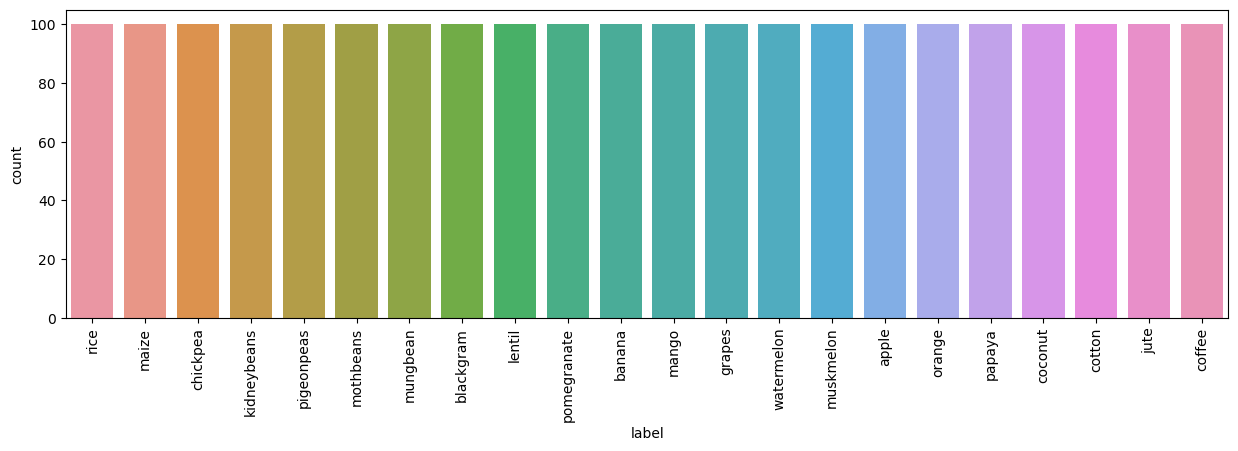

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(data=data,x='label')
plt.xticks(rotation = 90)
plt.show()

The classes are balanced

In [15]:
from sklearn.decomposition import PCA
import plotly.express as px
pca=PCA(n_components=2)
df_pca=pca.fit_transform(data.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=data['label'],title="Decomposed using PCA")
fig.show()

# Distributions for Agricultural Conditions

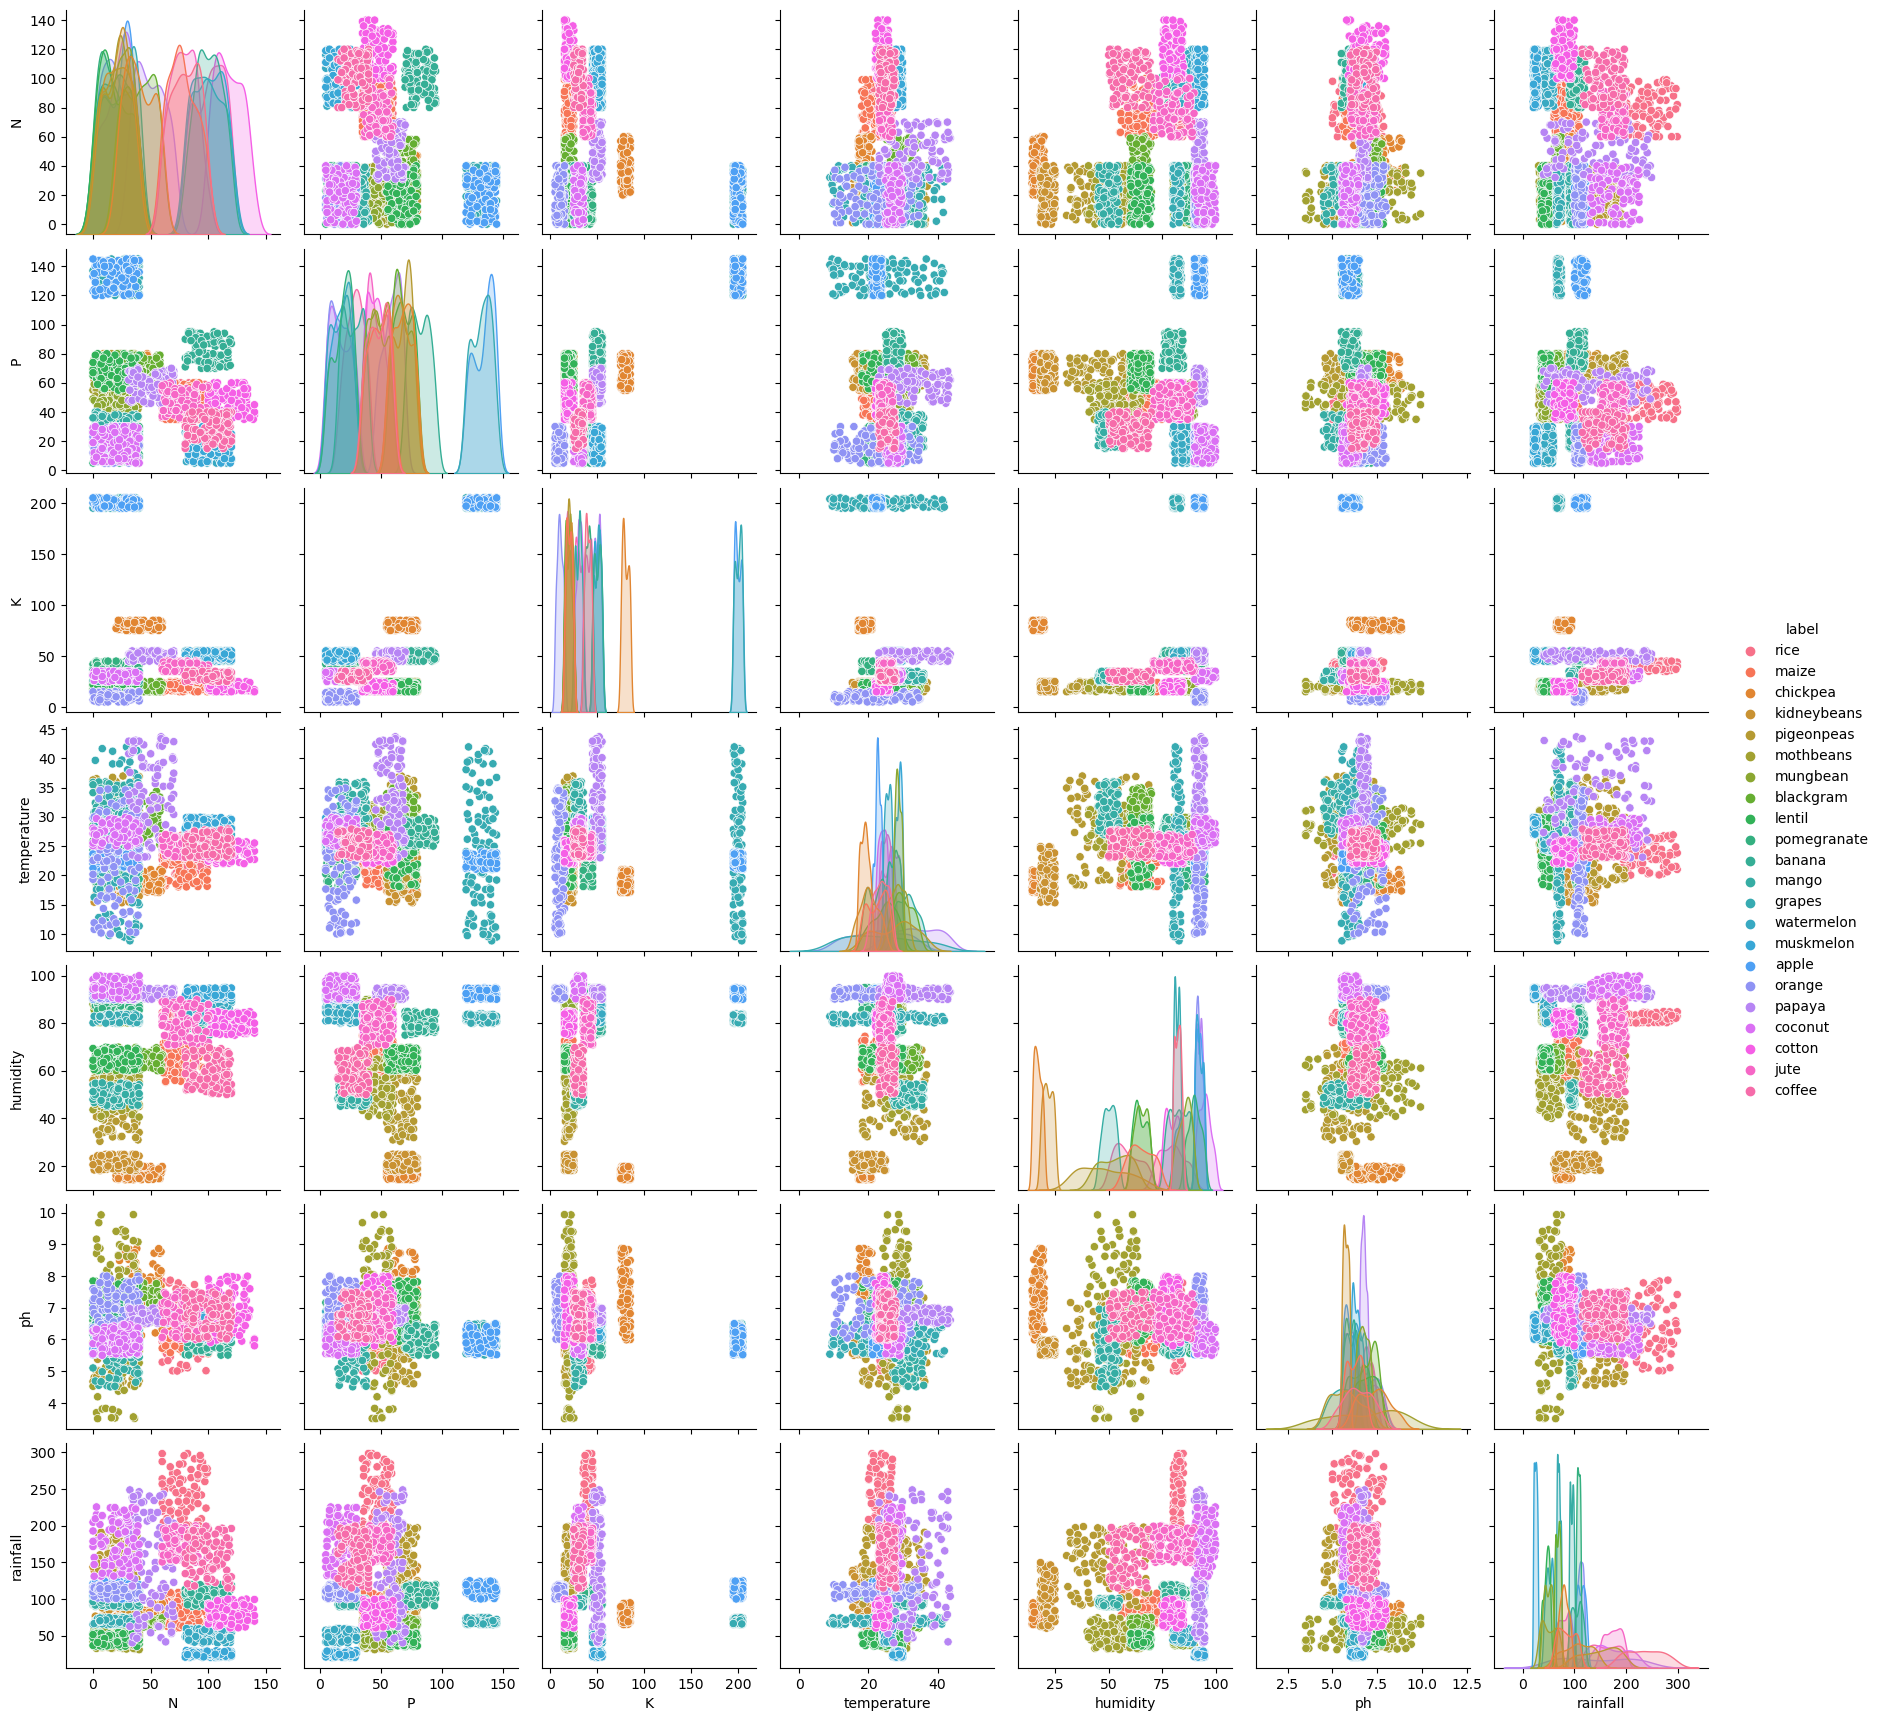

In [21]:
sns.pairplot(data=data,hue='label')
plt.show()

# More EDA

In [22]:
## Lets find out some Intersting Facts
print("Some Interesting Patterns")
print("--------------------------")
print("Crops which requires very High Ratio of Nirtogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature:", data[data['temperature'] > 10]['label'].unique())
print("Crops which requires very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidty:", data[data['humidity'] > 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Cr0ps which requires very Low pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
--------------------------
Crops which requires very High Ratio of Nirtogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidty: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low pH: ['m

# Seasonal Crops Recommendations ( Summer, Winter, Rainy)

In [24]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------------")
print("High Rainfall Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------
High Rainfall Crops
['rice' 'papaya' 'coconut']


# Data Preprocessing for Predictive Modelling

In [28]:
names = data['label'].unique()

In [29]:
#Encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])
data.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20

In [30]:
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("shape of y:", y.shape)

Shape of x: (2200, 7)
shape of y: (2200,)


# Training and Testing Sets for Validation of Results

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,shuffle = True, random_state = 42,stratify=y)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", x_test.shape)

The Shape of x train: (1980, 7)
The Shape of x test: (220, 7)
The Shape of y train: (1980,)
The Shape of y test: (220, 7)


# Model Development


In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [35]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Train XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**Ensemble by Averaging**

In [37]:
# Make predictions on the testing data
rf_predictions = rf_classifier.predict(x_test)
xgb_predictions = xgb_classifier.predict(x_test)

# Ensemble by averaging predictions
ensemble_predictions = (rf_predictions + xgb_predictions) / 2

# Round ensemble predictions to the nearest integer (assuming labels are integers)
ensemble_predictions = ensemble_predictions.round().astype(int)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9863636363636363


 # Evaluation of the Model Performance

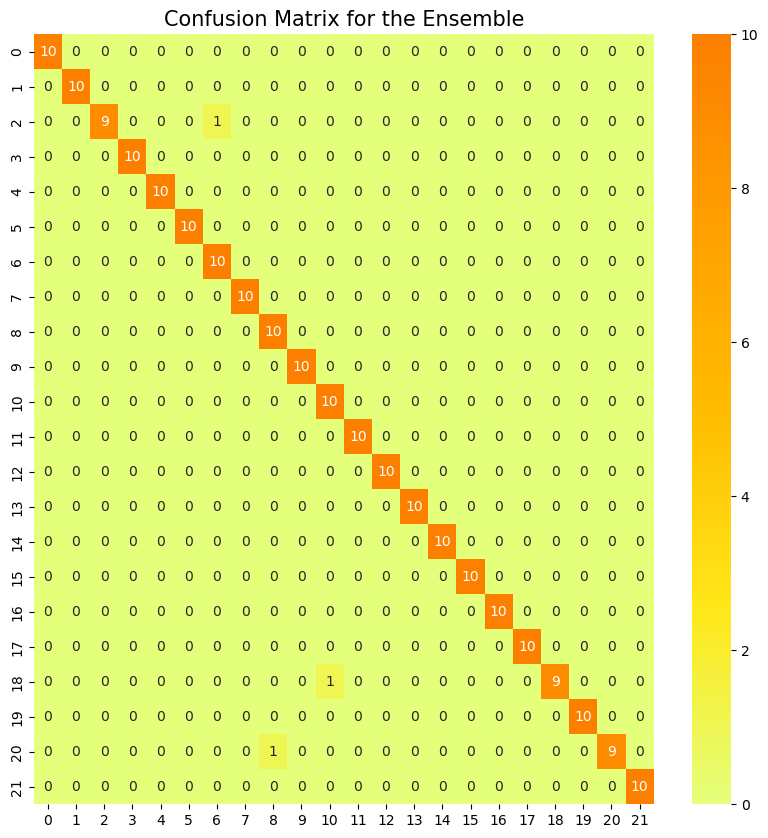

In [38]:
# Lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, ensemble_predictions)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title('Confusion Matrix for the Ensemble', fontsize=15)
plt.show()


# Printing out the Classification Report.

In [39]:
# Lets print the Classification Repost also
from sklearn.metrics import classification_report

cr = classification_report(y_test, ensemble_predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        10
           8       0.91      1.00      0.95        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

# Prediction

In [40]:
def predict_ensemble(models, data, label_encoder):
    # Preprocess the data
    X = np.array([data])
    
    # Make predictions using each model
    predictions = []
    for model in models:
        pred = model.predict(X)
        predictions.append(pred)
    
    # Ensemble by averaging predictions
    ensemble_predictions = sum(predictions) / len(models)
    
    # Round ensemble predictions to the nearest integer 
    ensemble_predictions = ensemble_predictions.round().astype(int)
    
    # Decode the predictions
    decoded_predictions = label_encoder.inverse_transform(ensemble_predictions)
    
    return decoded_predictions

In [41]:
models = [rf_classifier, xgb_classifier]

# Example prediction for given climatic conditions
climatic_conditions = [90, 40, 40, 20, 80, 7, 200]
prediction = predict_ensemble(models, climatic_conditions, encoder)
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['mungbean']


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



# Saving the Models

In [42]:
import pickle
# Save RandomForestClassifier using pickle
with open('rf_classifier_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Save XGBClassifier using pickle
with open('xgb_classifier_model.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)

In [44]:
# Save LabelEncoder using pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
N             
P              
K              
temperature    
humidity       
ph             
rainfall       